In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [500]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\bake9\AppData\Local\Temp\ipykernel_553480\2293910437.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### Read in Both Datasets

In [501]:
reads = pd.read_csv('1345_admin_reads.csv')
reads.head()

,topic_id,problem_id,user_id,read_id,labeling_state,patch,score,accuracy,contest_id,mission_id,content_id,chosen_answer,origin,origin_created_at,series,series_index,answerChoiceIds,response_submitted_at,problem_appeared_at
0,1345,5888087,55058,132610888,gold_standard,NaN,100,0.78,8011,NaN,3264386,['no'],https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg,2021-07-26 21:41:47.756010+00:00,NaN,NaN,[25796611],2022-04-12 09:20:24.912000+00:00,2022-04-12 09:20:24.415999+00:00
1,1345,5888087,248277,107696869,gold_standard,NaN,100,0.76,6437,NaN,3264386,['no'],https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg,2021-07-26 21:41:47.756010+00:00,NaN,NaN,[25796611],2021-12-04 15:00:58.596999+00:00,2021-12-04 15:00:56.760999+00:00
2,1345,5888088,19769,60673858,gold_standard,NaN,100,0.78,5183,NaN,3264387,['no'],https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg,2021-07-26 21:41:47.824498+00:00,NaN,NaN,[25796612],2021-08-09 07:41:17.754000+00:00,2021-08-09 07:41:16.961000+00:00
3,1345,5888088,237039,99676200,gold_standard,NaN,100,0.80,6151,NaN,3264387,['no'],https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg,2021-07-26 21:41:47.824498+00:00,NaN,NaN,[25796612],2021-11-01 12:05:16.948999+00:00,2021-11-01 12:05:16.076000+00:00
4,1345,5888088,280445,141519169,gold_standard,NaN,100,0.76,9076,NaN,3264387,['no'],https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg,2021-07-26 21:41:47.824498+00:00,NaN,NaN,[25796612],2022-06-10 12:16:45.950000+00:00,2022-06-10 12:16:45.112000+00:00


In [502]:
results = pd.read_csv('1345_customer_results.csv')
results.head()

,Case ID,Origin,Origin Created At,Content ID,URL,Labeling State,Series,Series Index,Patch,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation
0,5888087,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,NaN,NaN,NaN,2,'no','no',0.0,1.000,'no',2,1.54,'yes',0,0.00,NaN,[],NaN
1,5888088,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,NaN,NaN,NaN,3,'no','no',0.0,1.000,'no',3,2.34,'yes',0,0.00,NaN,[],NaN
2,5888089,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B13_time175617_medoid_vote0.jpg,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,NaN,NaN,NaN,2,'no','no',0.0,1.000,'no',2,1.70,'yes',0,0.00,NaN,[],NaN
3,5888090,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B19_time62657_medoid_vote0.jpg,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,NaN,NaN,NaN,1,'no','no',0.0,1.000,'no',1,0.82,'yes',0,0.00,NaN,[],NaN
4,5888091,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B12_time28993_medoid_vote4.jpg,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,NaN,NaN,NaN,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,NaN,[],NaN


In [503]:
results['Correct Label'] = results['Correct Label'].str.replace(r'"', '')

In [504]:
results['Majority Label'] = results['Majority Label'].str.replace(r'"', '')

In [505]:
results['First Choice Answer'] = results['First Choice Answer'].str.replace(r'"', '')

In [506]:
results['Second Choice Answer'] = results['Second Choice Answer'].str.replace(r'"', '')
results.head()

,Case ID,Origin,Origin Created At,Content ID,URL,Labeling State,Series,Series Index,Patch,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation
0,5888087,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,NaN,NaN,NaN,2,'no','no',0.0,1.000,'no',2,1.54,'yes',0,0.00,NaN,[],NaN
1,5888088,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,NaN,NaN,NaN,3,'no','no',0.0,1.000,'no',3,2.34,'yes',0,0.00,NaN,[],NaN
2,5888089,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B13_time175617_medoid_vote0.jpg,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,NaN,NaN,NaN,2,'no','no',0.0,1.000,'no',2,1.70,'yes',0,0.00,NaN,[],NaN
3,5888090,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B19_time62657_medoid_vote0.jpg,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,NaN,NaN,NaN,1,'no','no',0.0,1.000,'no',1,0.82,'yes',0,0.00,NaN,[],NaN
4,5888091,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B12_time28993_medoid_vote4.jpg,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,NaN,NaN,NaN,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,NaN,[],NaN


In [507]:
results['Origin'].unique()

array(['https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg',
       'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg',
       'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B13_time175617_medoid_vote0.jpg',
       ...,
       'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/S98_time55376_member_vote4.jpg',
       'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/S98_time206508_medoid_vote5.jpg',
       'https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/S98_time31489_member_vote5.jpg'],
      dtype=object)

In [508]:
len(results['Origin'])

30293

In [509]:
results_origin = results['Origin'].str.fullmatch(r'(.*)vote[0-8](.*)', case=False)
resulted = results.loc[results_origin]

#### Loop through Origin column in results.csv to split the image links and get only 'vote#'

In [510]:
results['Expert Yes'] = resulted["Origin"].str.extract(r'vote(\d)').astype(int)
print(results['Expert Yes'])

0        2.0
1        0.0
2        0.0
3        0.0
4        4.0
        ... 
30288    2.0
30289    3.0
30290    4.0
30291    5.0
30292    5.0
Name: Expert Yes, Length: 30293, dtype: float64


In [511]:
len(results[results['Expert Yes'] == 4])

3000

#### Create a function to determine if the vote is a yes, no, or has been dropped because it was a maybe

In [512]:
from numpy import NaN

def determine(row):
    if row['Expert Yes'] < 4:
        val = 'no'
    elif row['Expert Yes'] > 4 and row['Expert Yes'] < 9:
        val = 'yes'
    elif row['Expert Yes'] == 4:
        val = 'maybe'
    elif row['Expert Yes'] >= 9:
        val = np.nan
    else:
        val = np.nan
    return val

In [513]:
len(results[results['Expert Yes'] == 4])

3000

In [514]:
results['Answer'] = results.apply(determine, axis=1)

In [515]:
len(results[results['Expert Yes'] == 4])

3000

In [516]:
results['Answer'] = results['Answer'].dropna()

In [517]:
len(results[results['Expert Yes'] == 4])

3000

In [518]:
results.head()

,Case ID,Origin,Origin Created At,Content ID,URL,Labeling State,Series,Series Index,Patch,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Internal Notes,Comments,Explanation,Expert Yes,Answer
0,5888087,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B14_time139137_medoid_vote2.jpg,Jul 26 2021 21:41:47 PM,3264386,https://go.centaurlabs.com/problem/5888087,Gold Standard,NaN,NaN,NaN,2,'no','no',0.0,1.000,'no',2,1.54,'yes',0,0.00,NaN,[],NaN,2.0,no
1,5888088,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B10_time178433_medoid_vote0.jpg,Jul 26 2021 21:41:47 PM,3264387,https://go.centaurlabs.com/problem/5888088,Gold Standard,NaN,NaN,NaN,3,'no','no',0.0,1.000,'no',3,2.34,'yes',0,0.00,NaN,[],NaN,0.0,no
2,5888089,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B13_time175617_medoid_vote0.jpg,Jul 26 2021 21:41:47 PM,3264388,https://go.centaurlabs.com/problem/5888089,Gold Standard,NaN,NaN,NaN,2,'no','no',0.0,1.000,'no',2,1.70,'yes',0,0.00,NaN,[],NaN,0.0,no
3,5888090,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B19_time62657_medoid_vote0.jpg,Jul 26 2021 21:41:47 PM,3264389,https://go.centaurlabs.com/problem/5888090,Gold Standard,NaN,NaN,NaN,1,'no','no',0.0,1.000,'no',1,0.82,'yes',0,0.00,NaN,[],NaN,0.0,no
4,5888091,https://centaur-customer-uploads.s3.us-east-1.amazonaws.com/mgh-eeg/210721/jpg/B12_time28993_medoid_vote4.jpg,Jul 26 2021 21:41:47 PM,3264390,https://go.centaurlabs.com/problem/5888091,In Progress,NaN,NaN,NaN,7,NaN,'yes',NaN,0.571,'yes',4,3.28,'no',3,2.32,NaN,[],NaN,4.0,maybe


In [519]:
len(results[results['Answer'] == 'yes'])

12000

In [520]:
len(results[results['Answer'] == 'maybe'])

3000

In [521]:
len(results[results['Answer'] == 'no'])

12000

In [522]:
results = results.drop(results[['Origin', 'Origin Created At', 'Content ID', 'URL', 'Labeling State', 'Series', 'Series Index', 'Patch', 'Internal Notes', 'Comments', 'Explanation']], axis=1) 

In [523]:
results = results.dropna()
results.head()

,Case ID,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes,Answer
0,5888087,2,'no','no',0.0,1.0,'no',2,1.54,'yes',0,0.0,2.0,no
1,5888088,3,'no','no',0.0,1.0,'no',3,2.34,'yes',0,0.0,0.0,no
2,5888089,2,'no','no',0.0,1.0,'no',2,1.70,'yes',0,0.0,0.0,no
3,5888090,1,'no','no',0.0,1.0,'no',1,0.82,'yes',0,0.0,0.0,no
5,5888092,4,'no','no',0.0,1.0,'no',4,3.30,'yes',0,0.0,0.0,no


In [524]:
len(results[results['Expert Yes'] == 4])

0

### Descriptive Analysis

##### Begin by creating a function to calculate the expert accuracy ratings. 

In [525]:
def acc_calc(vote):
    if vote['Expert Yes'] >= 4.0:
        return (vote['Expert Yes']) / 8
    elif vote['Expert Yes'] < 4.0:
        return (8 - vote['Expert Yes']) / 8

In [526]:
len(results[results['Expert Yes'] == 4])

0

In [527]:
results['Expert Acc'] = results['Expert Yes']
results.head()

,Case ID,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes,Answer,Expert Acc
0,5888087,2,'no','no',0.0,1.0,'no',2,1.54,'yes',0,0.0,2.0,no,2.0
1,5888088,3,'no','no',0.0,1.0,'no',3,2.34,'yes',0,0.0,0.0,no,0.0
2,5888089,2,'no','no',0.0,1.0,'no',2,1.70,'yes',0,0.0,0.0,no,0.0
3,5888090,1,'no','no',0.0,1.0,'no',1,0.82,'yes',0,0.0,0.0,no,0.0
5,5888092,4,'no','no',0.0,1.0,'no',4,3.30,'yes',0,0.0,0.0,no,0.0


In [528]:
len(results[results['Expert Yes'] == 4])

0

In [529]:
results['Expert Acc'] = results.apply(acc_calc, axis=1)
results.head()

,Case ID,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes,Answer,Expert Acc
0,5888087,2,'no','no',0.0,1.0,'no',2,1.54,'yes',0,0.0,2.0,no,0.75
1,5888088,3,'no','no',0.0,1.0,'no',3,2.34,'yes',0,0.0,0.0,no,1.00
2,5888089,2,'no','no',0.0,1.0,'no',2,1.70,'yes',0,0.0,0.0,no,1.00
3,5888090,1,'no','no',0.0,1.0,'no',1,0.82,'yes',0,0.0,0.0,no,1.00
5,5888092,4,'no','no',0.0,1.0,'no',4,3.30,'yes',0,0.0,0.0,no,1.00


In [530]:
results['Crowd Acc'] = 1 - results['Difficulty']
results.head()

,Case ID,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes,Answer,Expert Acc,Crowd Acc
0,5888087,2,'no','no',0.0,1.0,'no',2,1.54,'yes',0,0.0,2.0,no,0.75,1.0
1,5888088,3,'no','no',0.0,1.0,'no',3,2.34,'yes',0,0.0,0.0,no,1.00,1.0
2,5888089,2,'no','no',0.0,1.0,'no',2,1.70,'yes',0,0.0,0.0,no,1.00,1.0
3,5888090,1,'no','no',0.0,1.0,'no',1,0.82,'yes',0,0.0,0.0,no,1.00,1.0
5,5888092,4,'no','no',0.0,1.0,'no',4,3.30,'yes',0,0.0,0.0,no,1.00,1.0


In [531]:
results['Crowd vs Exp'] = results['Expert Acc'] - results['Crowd Acc']
results.head()

,Case ID,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Yes,Answer,Expert Acc,Crowd Acc,Crowd vs Exp
0,5888087,2,'no','no',0.0,1.0,'no',2,1.54,'yes',0,0.0,2.0,no,0.75,1.0,-0.25
1,5888088,3,'no','no',0.0,1.0,'no',3,2.34,'yes',0,0.0,0.0,no,1.00,1.0,0.00
2,5888089,2,'no','no',0.0,1.0,'no',2,1.70,'yes',0,0.0,0.0,no,1.00,1.0,0.00
3,5888090,1,'no','no',0.0,1.0,'no',1,0.82,'yes',0,0.0,0.0,no,1.00,1.0,0.00
5,5888092,4,'no','no',0.0,1.0,'no',4,3.30,'yes',0,0.0,0.0,no,1.00,1.0,0.00


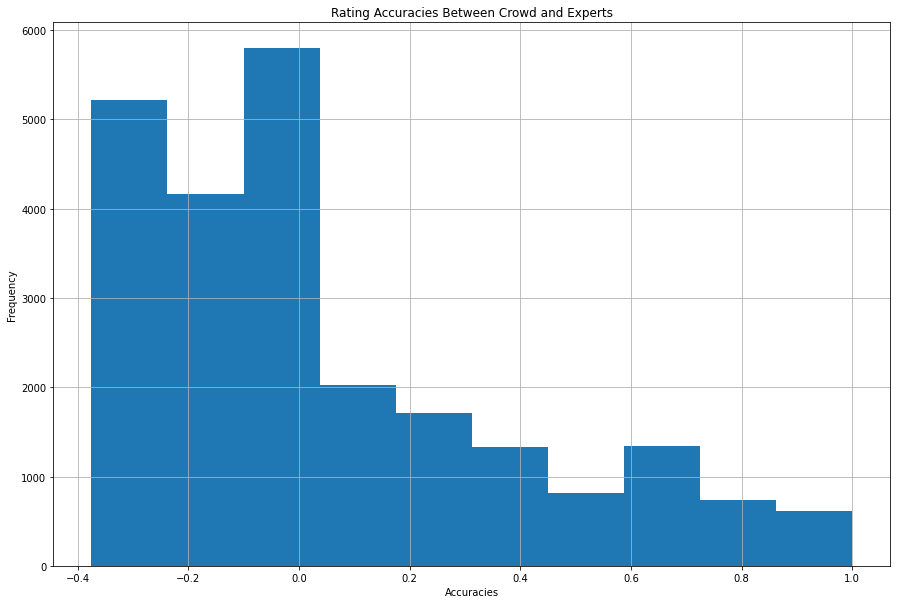

In [532]:
results['Crowd vs Exp'].hist(figsize = (15,10))
plt.title('Rating Accuracies Between Crowd and Experts')
plt.ylabel('Frequency')
plt.xlabel('Accuracies')
plt.show()

In [533]:
experts_rate = np.count_nonzero(results['Crowd vs Exp'] > 0) / len(results['Crowd vs Exp'])
experts_rate

0.37448438420742486

In [534]:
crowd_rate = np.count_nonzero(results['Crowd vs Exp'] < 0) / len(results['Crowd vs Exp'])
crowd_rate

0.429876252209782

##### Overall, we can see that for about half of the cases, the experts and the crowd agreed with one another (the 0.0 bins in the histogram). We found that for the cases where there was a split, the experts accurary rating was about 37% correct, while the crowd's accurating rating was about 43%.  

### Finding the number of times that experts were in agreement.

In [535]:
results = results.drop(results.iloc[:, 1:12].columns, axis=1)
results

,Case ID,Expert Yes,Answer,Expert Acc,Crowd Acc,Crowd vs Exp
0,5888087,2.0,no,0.750,1.000,-0.250
1,5888088,0.0,no,1.000,1.000,0.000
2,5888089,0.0,no,1.000,1.000,0.000
3,5888090,0.0,no,1.000,1.000,0.000
5,5888092,0.0,no,1.000,1.000,0.000
...,...,...,...,...,...,...
30286,5918373,5.0,yes,0.625,1.000,-0.375
30287,5918374,5.0,yes,0.625,1.000,-0.375
30288,5918375,2.0,no,0.750,0.000,0.750
30289,5918376,3.0,no,0.625,0.333,0.292


In [536]:
expert_results = results[results['Expert Acc'] == 1]
expert_results.head()

,Case ID,Expert Yes,Answer,Expert Acc,Crowd Acc,Crowd vs Exp
1,5888088,0.0,no,1.0,1.0,0.0
2,5888089,0.0,no,1.0,1.0,0.0
3,5888090,0.0,no,1.0,1.0,0.0
5,5888092,0.0,no,1.0,1.0,0.0
6,5888093,0.0,no,1.0,1.0,0.0


In [537]:
slim_maj_experts = results[results['Expert Yes'] == 5]
slim_maj_experts

,Case ID,Expert Yes,Answer,Expert Acc,Crowd Acc,Crowd vs Exp
413,5888500,5.0,yes,0.625,0.857,-0.232
3534,5891621,5.0,yes,0.625,0.000,0.625
3734,5891821,5.0,yes,0.625,0.400,0.225
3749,5891836,5.0,yes,0.625,1.000,-0.375
3827,5891914,5.0,yes,0.625,0.000,0.625
...,...,...,...,...,...,...
30281,5918368,5.0,yes,0.625,1.000,-0.375
30282,5918369,5.0,yes,0.625,0.667,-0.042
30286,5918373,5.0,yes,0.625,1.000,-0.375
30287,5918374,5.0,yes,0.625,1.000,-0.375


In [538]:
slim_maj = results[results['Expert Yes'] == 3]
slim_maj

,Case ID,Expert Yes,Answer,Expert Acc,Crowd Acc,Crowd vs Exp
203,5888290,3.0,no,0.625,1.000,-0.375
430,5888517,3.0,no,0.625,0.250,0.375
3726,5891813,3.0,no,0.625,0.857,-0.232
3762,5891849,3.0,no,0.625,0.000,0.625
3891,5891978,3.0,no,0.625,0.000,0.625
...,...,...,...,...,...,...
30256,5918343,3.0,no,0.625,0.000,0.625
30270,5918357,3.0,no,0.625,0.000,0.625
30277,5918364,3.0,no,0.625,0.250,0.375
30280,5918367,3.0,no,0.625,0.000,0.625


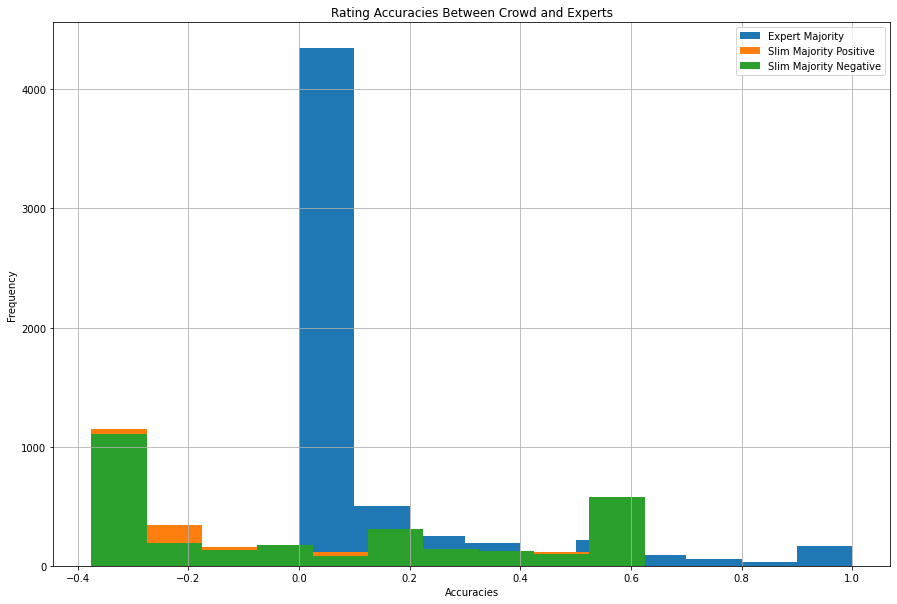

In [541]:
ax = expert_results['Crowd vs Exp'].hist()
slim_maj_experts['Crowd vs Exp'].hist(ax=ax, figsize = (15,10))
slim_maj['Crowd vs Exp'].hist(ax=ax, figsize = (15,10))
plt.title('Rating Accuracies Between Crowd and Experts')
plt.ylabel('Frequency')
plt.xlabel('Accuracies')
plt.legend(['Expert Majority', 'Slim Majority Positive', 'Slim Majority Negative'])
plt.show()

Above is the distribution of 8/8, 5/8, 3/8 expert votes, and the differences of each expert vote accuracy and the crowd sourced accuracy. The blue histogram shows that the distribution is quite heavy on 0.0, or no diffrence between the expert opinion and the crowd sourced opinion. When there is slightly more and less expert votes, we see a heavier presence in the negative bins, showing that in these cases there was lower expert accuracy.  

### Full Expert Vote Accuracy

In [547]:
len(expert_results[expert_results['Crowd vs Exp'] < 0])/len(expert_results)

0.0

When experts are fully accurate (8/8 votes), we can see that there is no difference in crowd performing levels and crowsourced accuracy. 

### Majority Expert Vote Accuracy

In [549]:
expert_maj = results[results['Expert Yes'] >= 6]
expert_maj.head()

,Case ID,Expert Yes,Answer,Expert Acc,Crowd Acc,Crowd vs Exp
3685,5891772,6.0,yes,0.750,1.000,-0.250
3720,5891807,7.0,yes,0.875,0.571,0.304
3723,5891810,6.0,yes,0.750,0.875,-0.125
3745,5891832,7.0,yes,0.875,0.833,0.042
3774,5891861,7.0,yes,0.875,1.000,-0.125


In [550]:
len(expert_maj[expert_maj['Crowd vs Exp'] < 0])/len(expert_maj)

0.4316964285714286

When there are almost accurate expert votes (6/8), we see that the crowd perfroms better than the experts 43% of the time. 

### Slim Majority Votes

In [546]:
len(slim_maj_experts[slim_maj_experts['Crowd vs Exp'] < 0])/len(slim_maj_experts)

0.6016750418760469

Here we can identify that when there was a slim majority (i.e. 5/8 expert votes), the crow performs better than the experts 60% of the time.

### Less Accurate Expert Votes

In [554]:
len(slim_maj[slim_maj['Crowd vs Exp'] < 0])/len(slim_maj)

0.5445913869108172

Once we have less accurate expert voting (3/8 votes), we find that the crowd performs better in 54% of cases.

Add a conclusion, and add in weight aggregation as well as apply some form of machine learning

Remove 'no' for correct label column

qualified reads, and weight aggregations, as wella sthe correct column and compare

compare expert vs expert opinion as well as crowd sourced vs crowdsourced comparisons